# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 9 submission</b></u>

### Roster Name: Austin Rivard
### Student ID: 015044445
### Email address: austin.rivard@sjsu.edu

##  <u>References and sources </u>

https://machinelearningmastery.com/how-to-reduce-generalization-error-in-deep-neural-networks-with-activity-regularization-in-keras/

Code excerpts taken from class reference notebook Autoencoders.MNIST.ipynb by Dr. Yulia Newton

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pydot
from skimage import io
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
from tensorflow.python.keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

#### Code the solution

In [4]:
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)
x_train.shape, x_validation.shape, x_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [5]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [6]:
# Reshape the images into flat ANN layers
x_train = x_train.reshape(-1, 784)
x_validation = x_validation.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train.shape, x_validation.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 784))

In [8]:
input_layer = layers.Input(784)
e1 = layers.Dense(128, activation='relu', activity_regularizer=regularizers.l1(1e-4))(input_layer)
e2 = layers.Dense(64, activation='relu', activity_regularizer=regularizers.l1(1e-4))(e1)
encoded_input = layers.Dense(32, activation='relu', activity_regularizer=regularizers.l1(1e-4))(e2)

encoder = keras.Model(input_layer, encoded_input)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [9]:
d1 = layers.Dense(64, activation='relu', activity_regularizer=regularizers.l1(1e-4))(encoded_input)
d2 = layers.Dense(128, activation='relu', activity_regularizer=regularizers.l1(1e-4))(d1)
decoder_layer = layers.Dense(784, activation='sigmoid')(d2)

decoder = keras.Model(encoded_input, decoder_layer)
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [10]:
autoencoder = keras.Model(input_layer, decoder_layer)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               1011

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_validation, x_validation))

Epoch 1/100
188/188 [==============================] - 9s 16ms/step - loss: 0.4420 - val_loss: 0.3569
Epoch 2/100
188/188 [==============================] - 2s 9ms/step - loss: 0.3393 - val_loss: 0.3291
Epoch 3/100
188/188 [==============================] - 1s 7ms/step - loss: 0.3248 - val_loss: 0.3212
Epoch 4/100
188/188 [==============================] - 1s 7ms/step - loss: 0.3183 - val_loss: 0.3159
Epoch 5/100
188/188 [==============================] - 2s 8ms/step - loss: 0.3136 - val_loss: 0.3118
Epoch 6/100
188/188 [==============================] - 2s 8ms/step - loss: 0.3100 - val_loss: 0.3086
Epoch 7/100
188/188 [==============================] - 1s 8ms/step - loss: 0.3072 - val_loss: 0.3062
Epoch 8/100
188/188 [==============================] - 2s 9ms/step - loss: 0.3051 - val_loss: 0.3044
Epoch 9/100
188/188 [==============================] - 1s 7ms/step - loss: 0.3035 - val_loss: 0.3031
Epoch 10/100
188/188 [==============================] - 2s 8ms/step - loss: 0.3021 - val_l

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

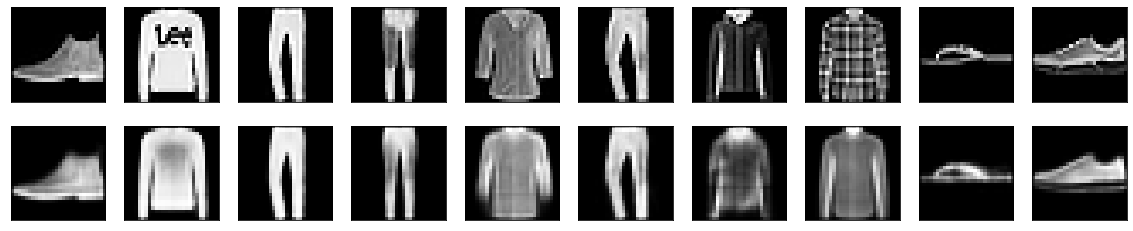

In [13]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#2. Convolution

In [14]:
# shape back into image matrices
x_train = x_train.reshape(-1, 28, 28, 1)
x_validation = x_validation.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [18]:
# add noise to images
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_validation_noisy = x_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_validation.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_validation_noisy = np.clip(x_validation_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [19]:
input_layer = layers.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 7, 32)          9248

In [20]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_validation_noisy, x_validation))

Epoch 1/50
188/188 [==============================] - 13s 26ms/step - loss: 0.3440 - val_loss: 0.3087
Epoch 2/50
188/188 [==============================] - 4s 23ms/step - loss: 0.3045 - val_loss: 0.3012
Epoch 3/50
188/188 [==============================] - 4s 23ms/step - loss: 0.2988 - val_loss: 0.2968
Epoch 4/50
188/188 [==============================] - 4s 23ms/step - loss: 0.2962 - val_loss: 0.2952
Epoch 5/50
188/188 [==============================] - 5s 24ms/step - loss: 0.2941 - val_loss: 0.2930
Epoch 6/50
188/188 [==============================] - 4s 23ms/step - loss: 0.2926 - val_loss: 0.2916
Epoch 7/50
188/188 [==============================] - 4s 23ms/step - loss: 0.2914 - val_loss: 0.2906
Epoch 8/50
188/188 [==============================] - 4s 23ms/step - loss: 0.2903 - val_loss: 0.2897
Epoch 9/50
188/188 [==============================] - 4s 23ms/step - loss: 0.2894 - val_loss: 0.2890
Epoch 10/50
188/188 [==============================] - 4s 23ms/step - loss: 0.2885 - val_l

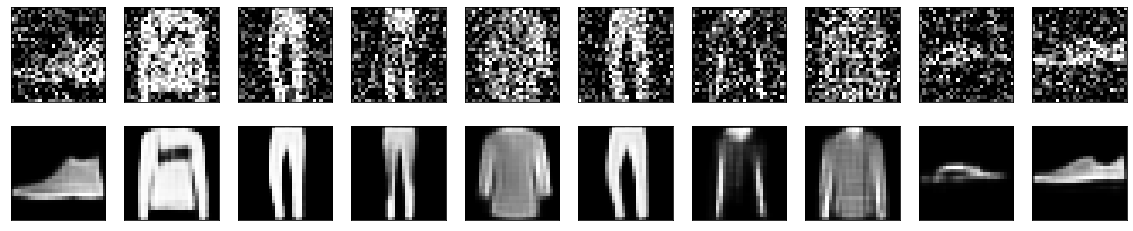

In [21]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()